In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
from skimage.io import imread
from skimage.util import montage as montage2d
from skimage.morphology import skeletonize
from skimage.filters import threshold_yen as thresh_func
from skimage.filters import median
from skimage.morphology import disk, diamond
from skimage.morphology import label as sk_label #ndimage has function label as well with different call
from skimage.morphology import opening, closing
from skimage.morphology import medial_axis
from skimage.morphology import skeletonize
from skimage import draw
from scipy import ndimage
import networkx as nx
from IPython.display import Image
import pandas as pd

In [2]:
def Image_read_thresh(img_path):
  img=cv2.imread(img_path,0)#reading image as a grayscale
  plt.imshow(img,cmap='gray')

  ret,thresh = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
  plt.imshow(thresh,cmap='gray')



In [3]:

img=cv2.imread('plot.png',0)#reading image as a grayscale
ret,thresh = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
np.count_nonzero(thresh==0)

6332

Text(0.5, 1.0, 'Edge Image')

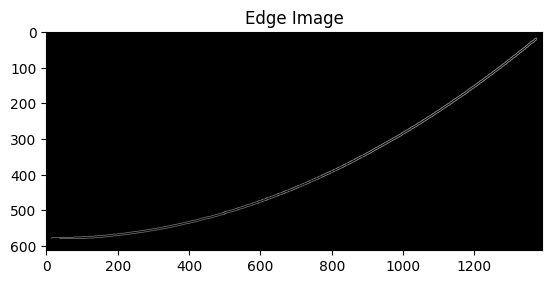

In [4]:
edges = cv2.Canny(img,100,200)
plt.imshow(edges,cmap = 'gray');plt.title('Edge Image')

In [5]:
def stroke_thickness_img(in_img):
    skel, distance = medial_axis(in_img, return_distance=True)
    skeleton = skeletonize(in_img)
    # Distance to the background for pixels of the skeleton
    plt.imshow(skeleton,cmap='gray')
    return skeleton *distance

In [6]:
thresh[thresh == 255] = 1


In [7]:
def read_and_thresh(in_path, resize=True):
    c_img = process_imread(in_path, resize=resize)
    c_img = (255*c_img).clip(0, 255).astype('uint8')
    c_img = median(c_img, disk(1))
    c_thresh = thresh_func(c_img)
    return c_img>c_thresh

In [ ]:
from skimage.io import imread


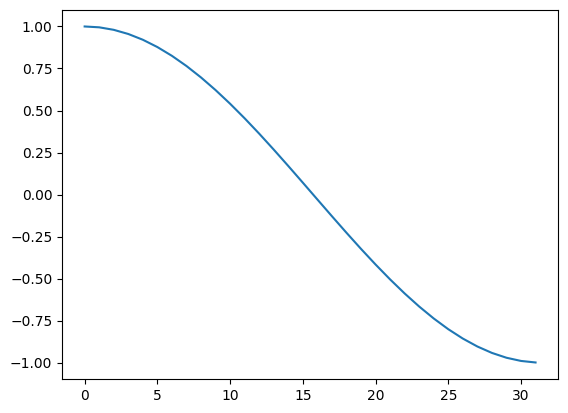

In [ ]:
plt.plot(np.cos(np.arange(0,np.pi,0.1)))
plt.savefig('sine.png')


In [ ]:
np.cos(np.arange(0,np.pi,0.1))

array([ 1.        ,  0.99500417,  0.98006658,  0.95533649,  0.92106099,
        0.87758256,  0.82533561,  0.76484219,  0.69670671,  0.62160997,
        0.54030231,  0.45359612,  0.36235775,  0.26749883,  0.16996714,
        0.0707372 , -0.02919952, -0.12884449, -0.22720209, -0.32328957,
       -0.41614684, -0.5048461 , -0.58850112, -0.66627602, -0.73739372,
       -0.80114362, -0.85688875, -0.90407214, -0.94222234, -0.97095817,
       -0.9899925 , -0.99913515])

In [22]:
z=imread("plot.png")

In [8]:
def process_imread(in_path, resize=True):
    """read images, invert and scale them"""
    c_img = 1.0-imread(in_path, as_gray=True)
    max_dim = np.max(c_img.shape)
    if not resize:
        return c_img
    if c_img.shape==(256, 256):
        return c_img
    if max_dim>256:
        big_dim = 512
    else:
        big_dim = 256
    """ pad with zeros and center image, sizing to either 256 or 512"""
    out_img = np.zeros((big_dim, big_dim), dtype='float32')
    c_offset = (big_dim-c_img.shape[0])//2
    d_offset = c_img.shape[0]+c_offset

    e_offset = (big_dim-c_img.shape[1])//2
    f_offset = c_img.shape[1]+e_offset
    out_img[c_offset:d_offset, e_offset:f_offset] = c_img[:(d_offset-c_offset), :(f_offset-e_offset)]
    return out_img

In [9]:
def read_and_thresh(in_path, resize=True):
    c_img = process_imread(in_path, resize=resize)
    c_img = (255*c_img).clip(0, 255).astype('uint8')
    c_img = median(c_img, disk(1))
    c_thresh = thresh_func(c_img)
    return c_img>c_thresh

In [10]:
img=read_and_thresh("plot.png",False)
skel=skeletonize(img)

In [ ]:
skel[-1]

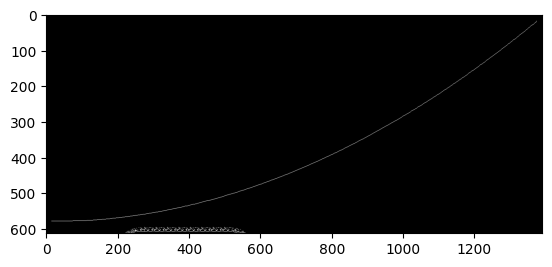

In [11]:
plt.imshow(skeletonize(skel),cmap="gray")

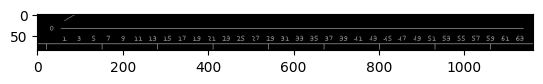

In [ ]:
plt.imshow(skel[500:][200:],cmap="gray")

In [ ]:
np.count_nonzero(imshow==1)

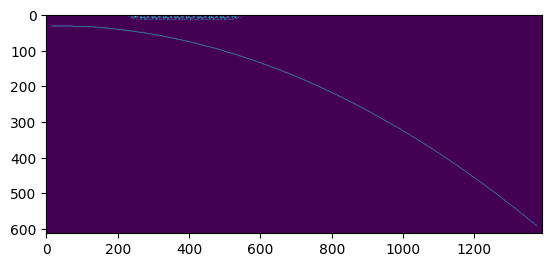

In [12]:
plt.imshow(np.flipud(skel))

In [16]:
indices = np.argwhere(skel == 1)
(indices)

array([[  40, 2462],
       [  40, 2466],
       [  40, 2467],
       ...,
       [1364,   14],
       [1365,    9],
       [1365,   10]])

In [ ]:
skel[indices[:,0],indices[:,1]]

array([ True,  True,  True, ...,  True,  True,  True])

In [26]:
sk_up=np.flipud(skel)
f=np.argwhere(sk_up == 1)
scale_y,scale_x=sk_up.shape
scale_y,scale_x

(1392, 2478)

In [28]:
y_p,x_p=skel.shape
x_p=x_p/20
y_p=y_p/10

In [32]:
f[:,1]/x_p

array([ 0.07263923,  0.08071025,  0.08878128, ..., 19.8708636 ,
       19.9031477 , 19.91121872])

In [19]:
skel.shape

(1392, 2478)

In [ ]:
np.flipud(skel)

In [ ]:
def calc_x_y(sk_image,x_scale,y_scale): # reads an skeletonized image , and then loop each pixel to find the x,y of it
#x and y sacles are lists
  sk_up=np.flipud(sk_image)#flipped Image
  result=np.argwhere(sk_up == 1)
  XPoints=((result[:,0])//max(result[:,0])) * (max(result[:,0])-min(result[:,0])) + (x_scale[1]-x_scale[0]) # for X-axis
  YPoints=((result[:,1])//max(result[:,1])) * (max(result[:,1])-min(result[:,1])) + (x_scale[1]-x_scale[0]) # for X-axis

  return XPoints,YPoints



In [13]:
def calc_x_y2(sk_image,x_scale,y_scale): # reads an skeletonized image , and then loop each pixel to find the x,y of it
#x and y sacles are lists
  sk_up=np.flipud(sk_image)#flipped Image
  result=np.argwhere(sk_up == 1)
  y_p,x_p=sk_image.shape
  #print( y_p,x_p)
  #x_p=x_p/x_scale[1]
  #y_p=y_p/10
  X_point=(result[:,1]/x_p) * x_scale[1]#X

  Y_point=(result[:,0]/y_p) * y_scale[1]#y

  return  X_point,Y_point


In [ ]:
(calc_x_y(skel,[10,20],[10,20]))[0]

In [ ]:
np.shape((calc_x_y(skel,[10,20],[10,20])))

(2, 2536)

In [16]:
x,y=calc_x_y2(skel,[40,100],[1600,10000])

In [ ]:
sorted(y)

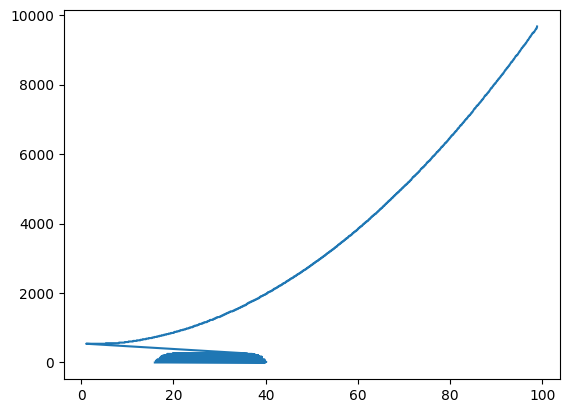

In [17]:
plt.plot(x,y)

In [40]:
result

array([[  26,    9],
       [  26,   10],
       [  27,   11],
       ...,
       [1351, 2462],
       [1351, 2466],
       [1351, 2467]])

In [73]:
sk_up=np.flipud(skel)#flipped Image
result=np.argwhere(sk_up == 1)
y_p,x_p=skel.shape
  #x_p=x_p/x_scale[1]
  #y_p=y_p/10
X_point=(result[:,1]/x_p) * 381#X
Y_point=(result[:,0]/y_p) * 145161#y